This notebook is part of [**Byron v0.1**](https://github.com/squillero/byron)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.tldrlegal.com/license/apache-license-2-0-apache-2-0) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_53541/1429530752.py:1: RuntimeWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/squillero/byron/blob/pre-alpha/docs/paranoia.md for details]
  import byron


Everything under the namespace `byron.framework` (lazy fingers can use `byron.f`).

# Local References

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))

Local references are inside the same macro bunch.

In [3]:
local_ref = byron.f.local_reference(backward=True, loop=False, forward=True)
local_ref

byron.parameter.LocalReference[<≠>]

In [4]:
macro_jmp = byron.f.macro('jmp {target}', target=local_ref)
bunch = byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=10)

In [5]:
byron.f.show(bunch)

; 🖋 n1 ➜ Frame❬MacroArray#1❭
bar +5.223e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
bar +5.721e-01  ; 🖋 n1.n3 ➜ Macro❬User#2❭
bar -7.438e-01  ; 🖋 n1.n4 ➜ Macro❬User#2❭
jmp n10  ; 🖋 n1.n5 ➜ Macro❬User#3❭
n6:
foo #5eec  ; 🖋 n1.n6 ➜ Macro❬User#1❭
jmp n6  ; 🖋 n1.n7 ➜ Macro❬User#3❭
foo #ed40  ; 🖋 n1.n8 ➜ Macro❬User#1❭
foo #a4d4  ; 🖋 n1.n9 ➜ Macro❬User#1❭
n10:
bar +6.455e-01  ; 🖋 n1.n10 ➜ Macro❬User#2❭
jmp n6  ; 🖋 n1.n11 ➜ Macro❬User#3❭


/Users/giovanni/Library/Caches/pypoetry/virtualenvs/byron-jT9JMjla-py3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)
/Users/giovanni/Repos/byron/byron/classes/individual.py:774: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


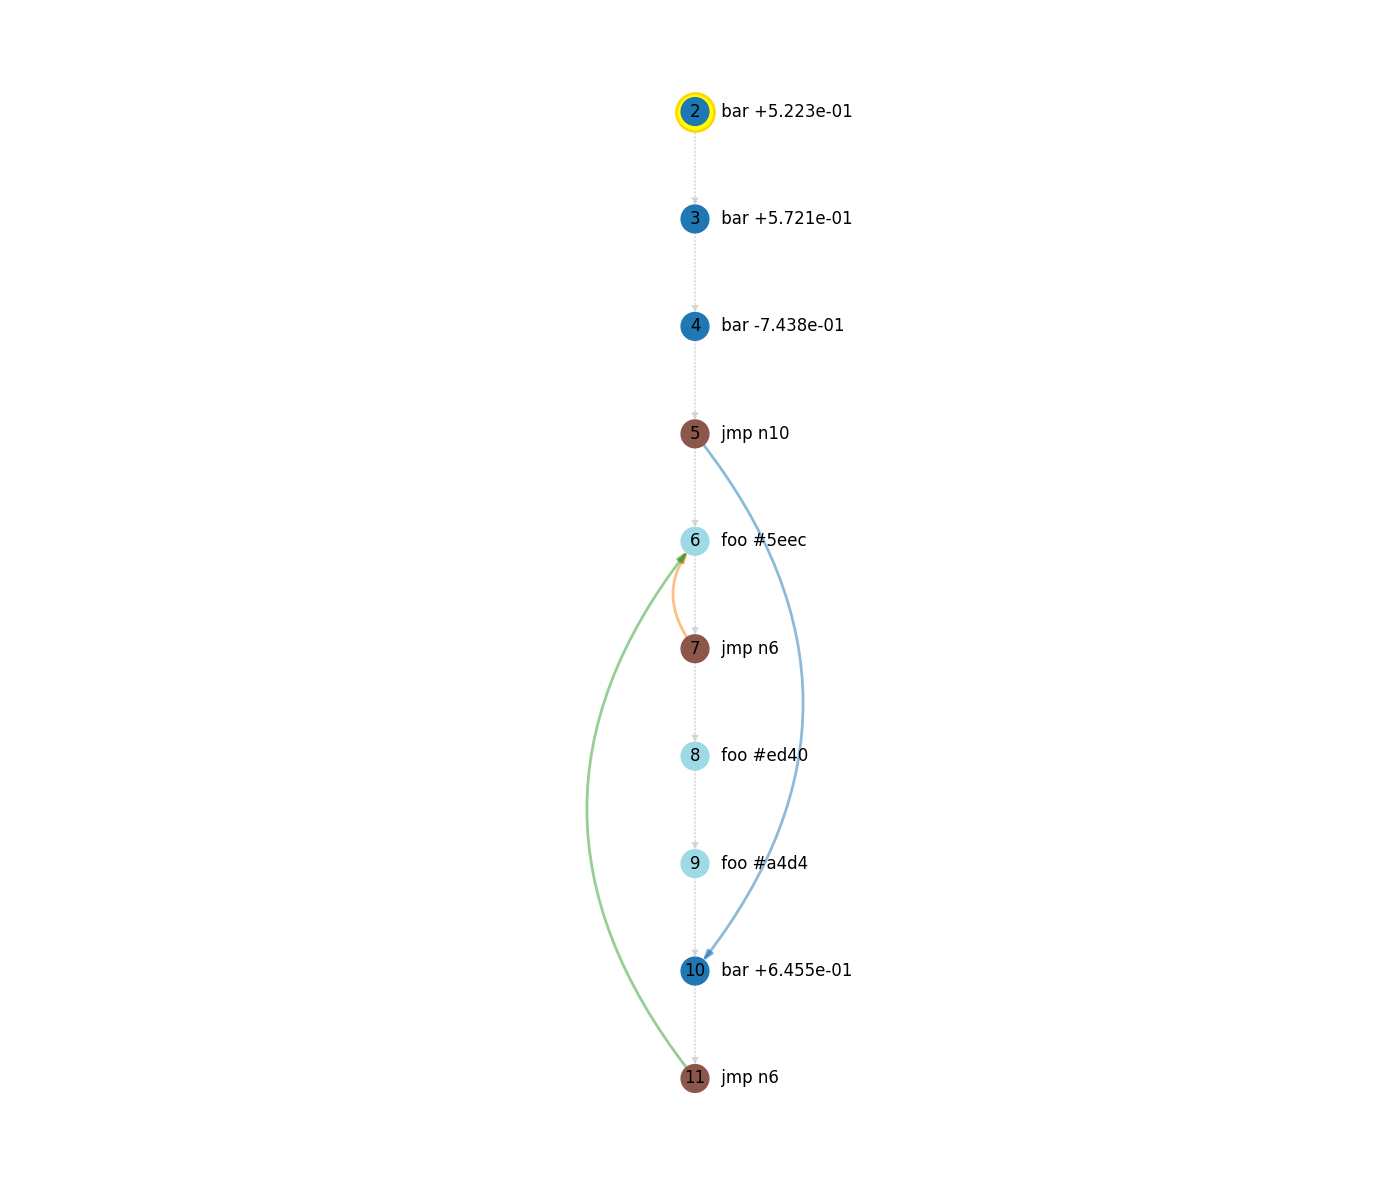

In [6]:
byron.f.show(bunch, as_lgp=True)

## Label format

By default, if a node is the target of a reference, the `_label` is printed pefore it. The default is `{_node}:\n`, but it may be tweaked in different ways.

In [7]:
byron.f.show(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5))

; 🖋 n1 ➜ Frame❬MacroArray#2❭
bar -8.116e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
bar +9.512e-01  ; 🖋 n1.n3 ➜ Macro❬User#2❭
n4:
bar +5.223e-01  ; 🖋 n1.n4 ➜ Macro❬User#2❭
jmp n4  ; 🖋 n1.n5 ➜ Macro❬User#3❭
foo #c93b  ; 🖋 n1.n6 ➜ Macro❬User#1❭


In [8]:
byron.f.show(byron.f.bunch([macro_foo, macro_bar, macro_jmp], size=5, extra_parameters={'_label': '<<{_node}>> '}))

; 🖋 n1 ➜ Frame❬MacroArray#3❭
bar -8.116e-01  ; 🖋 n1.n2 ➜ Macro❬User#2❭
bar +9.512e-01  ; 🖋 n1.n3 ➜ Macro❬User#2❭
<<n4>> bar +5.223e-01  ; 🖋 n1.n4 ➜ Macro❬User#2❭
jmp n4  ; 🖋 n1.n5 ➜ Macro❬User#3❭
foo #c93b  ; 🖋 n1.n6 ➜ Macro❬User#1❭


The extra parameters defined in a frame are valid for all successor frames 

In [9]:
loop = byron.f.macro('loop {me}', me=byron.f.local_reference(backward=False, forward=False))
seq1 = byron.f.sequence([loop, loop, loop])
seq2 = byron.f.sequence([seq1, seq1])
custom = byron.f.sequence([seq2], extra_parameters={'_label': '<<<<{_node}>>>:\n'})
seq3 = byron.f.sequence([seq2, custom, seq2])
byron.f.show(seq3)

; 🖋 n1 ➜ Frame❬FrameSequence#4❭
; 🖋 n1.n2 ➜ Frame❬FrameSequence#2❭
; 🖋 n1.n2.n3 ➜ Frame❬FrameSequence#1❭
n4:
loop n4  ; 🖋 n1.n2.n3.n4 ➜ Macro❬User#4❭
n5:
loop n5  ; 🖋 n1.n2.n3.n5 ➜ Macro❬User#4❭
n6:
loop n6  ; 🖋 n1.n2.n3.n6 ➜ Macro❬User#4❭
; 🖋 n1.n2.n7 ➜ Frame❬FrameSequence#1❭
n8:
loop n8  ; 🖋 n1.n2.n7.n8 ➜ Macro❬User#4❭
n9:
loop n9  ; 🖋 n1.n2.n7.n9 ➜ Macro❬User#4❭
n10:
loop n10  ; 🖋 n1.n2.n7.n10 ➜ Macro❬User#4❭
; 🖋 n1.n11 ➜ Frame❬FrameSequence#3❭
; 🖋 n1.n11.n12 ➜ Frame❬FrameSequence#2❭
; 🖋 n1.n11.n12.n13 ➜ Frame❬FrameSequence#1❭
<<<<n14>>>:
loop n14  ; 🖋 n1.n11.n12.n13.n14 ➜ Macro❬User#4❭
<<<<n15>>>:
loop n15  ; 🖋 n1.n11.n12.n13.n15 ➜ Macro❬User#4❭
<<<<n16>>>:
loop n16  ; 🖋 n1.n11.n12.n13.n16 ➜ Macro❬User#4❭
; 🖋 n1.n11.n12.n17 ➜ Frame❬FrameSequence#1❭
<<<<n18>>>:
loop n18  ; 🖋 n1.n11.n12.n17.n18 ➜ Macro❬User#4❭
<<<<n19>>>:
loop n19  ; 🖋 n1.n11.n12.n17.n19 ➜ Macro❬User#4❭
<<<<n20>>>:
loop n20  ; 🖋 n1.n11.n12.n17.n20 ➜ Macro❬User#4❭
; 🖋 n1.n21 ➜ Frame❬FrameSequence#2❭
; 🖋 n1.n21.n22 ➜ F

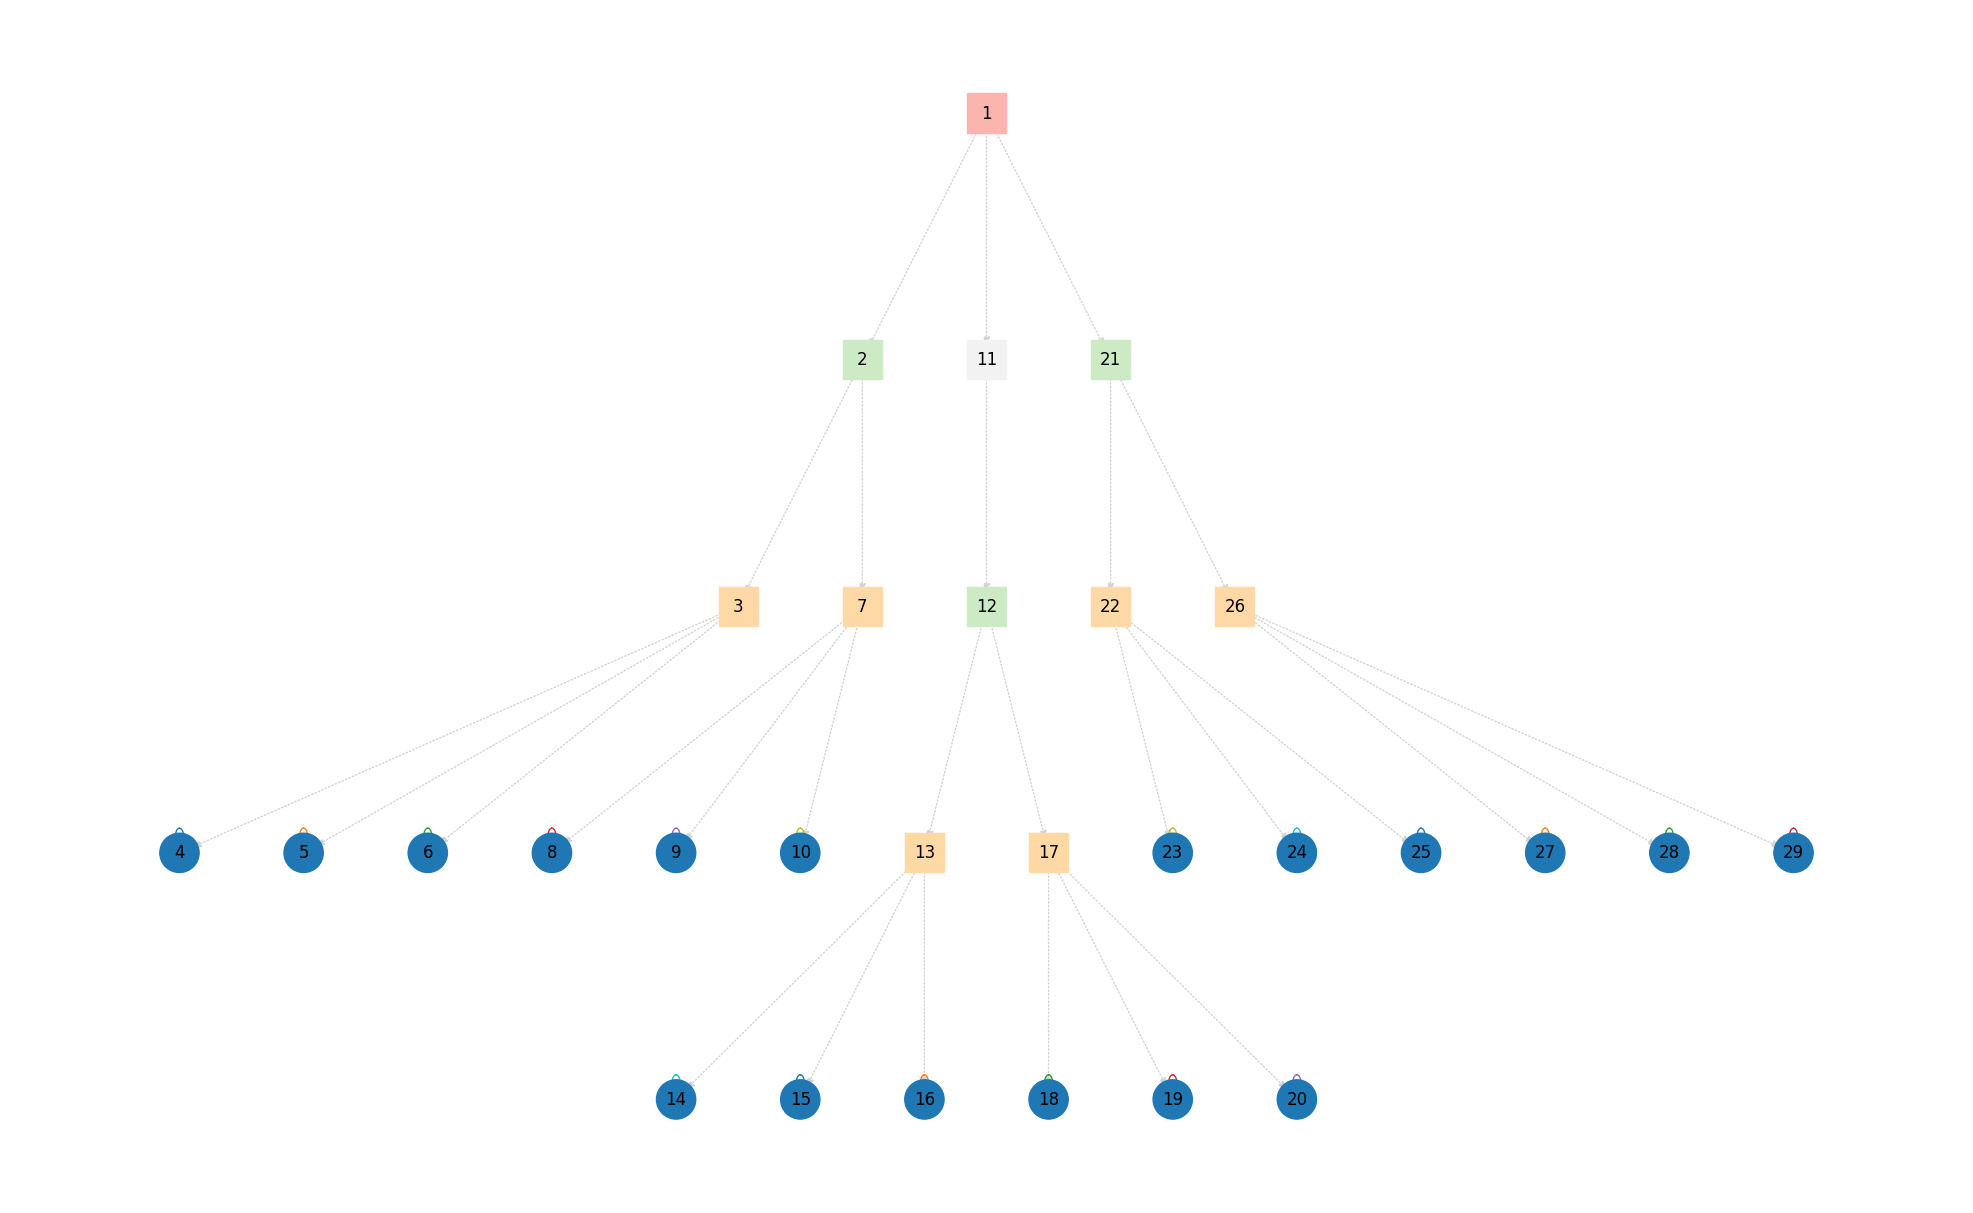

In [10]:
byron.f.show(seq3, as_forest=True)